In [1]:
# importing libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential


In [3]:
img_array = cv2.imread("Training/0/Training_99982465.jpg")

In [4]:
img_array.shape

(48, 48, 3)

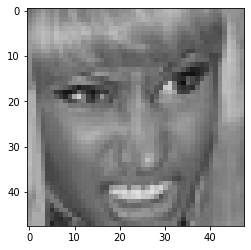

In [5]:
plt.imshow(img_array)

In [9]:
Datadirectory = "Training/"
Datadirectory_test="Testing/"

In [10]:
classes = ['0','1','2','3','4','5','6']

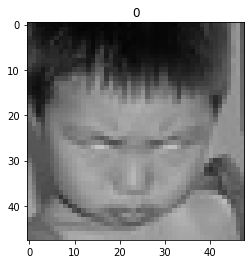

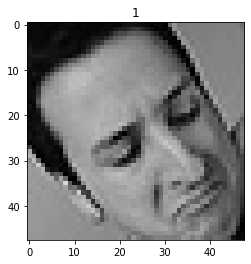

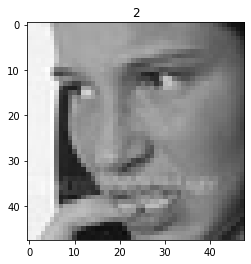

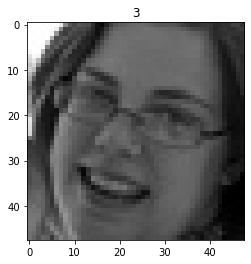

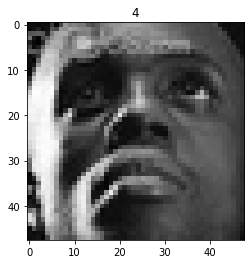

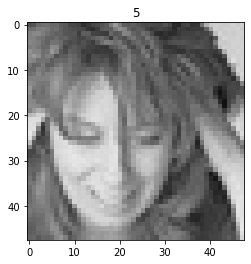

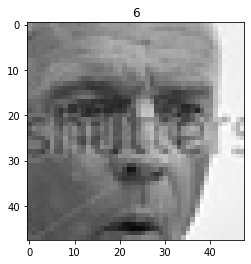

In [11]:
# let's view image from each emotion
for category in classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.title(category)
        plt.show()
        break
    

In [12]:
#Making Training and Validation Data
batch_size  = 128
picture_size = 48

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(Datadirectory,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(Datadirectory_test,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [19]:
#Importing libraries for creating model
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.optimizers import *

from tensorflow.keras.layers import BatchNormalization

In [18]:
#Let's create the model
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)      

In [20]:
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [24]:
# Fitting the model
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )

Epoch 1/48
224/224 [==============================] - 1228s 5s/step - loss: 1.7621 - accuracy: 0.3213 - val_loss: 2.1368 - val_accuracy: 0.2867 - lr: 0.0010
Epoch 2/48
224/224 [==============================] - 1189s 5s/step - loss: 1.4052 - accuracy: 0.4605 - val_loss: 1.3129 - val_accuracy: 0.4971 - lr: 0.0010
Epoch 3/48
224/224 [==============================] - 1194s 5s/step - loss: 1.2635 - accuracy: 0.5165 - val_loss: 1.3210 - val_accuracy: 0.4838 - lr: 0.0010
Epoch 4/48
224/224 [==============================] - 1195s 5s/step - loss: 1.1812 - accuracy: 0.5494 - val_loss: 1.2101 - val_accuracy: 0.5311 - lr: 0.0010
Epoch 5/48
224/224 [==============================] - 1198s 5s/step - loss: 1.1139 - accuracy: 0.5720 - val_loss: 1.2101 - val_accuracy: 0.5389 - lr: 0.0010
Epoch 6/48
224/224 [==============================] - 1196s 5s/step - loss: 1.0624 - accuracy: 0.5958 - val_loss: 1.2323 - val_accuracy: 0.5296 - lr: 0.0010
Epoch 7/48
224/224 [==============================] - 1195

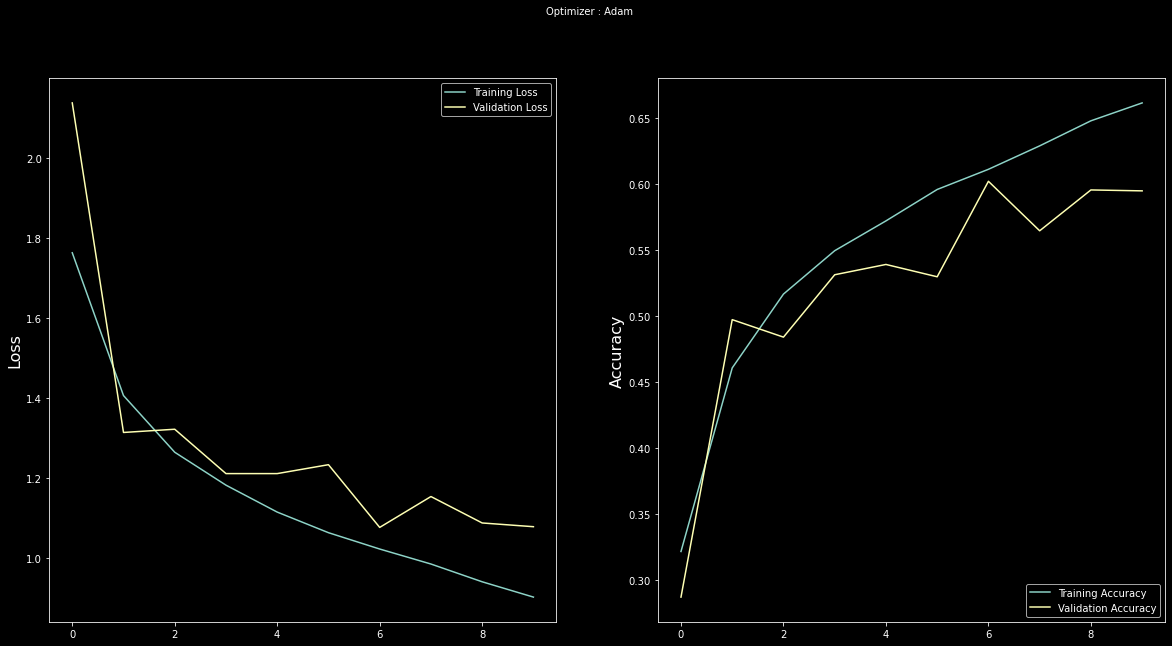

In [25]:
# Plotting accuracy graph
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [48]:
# saving the model as a .json file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [47]:
#Saving the model as a .h5 file
model.save('model_final.h5')
print("Saved model to disk")
 

Saved model to disk
